# Ensemble learning (classification)

In [47]:
%load_ext autoreload
%autoreload 2

!python --version

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Python 3.7.6


In [48]:
import sys
sys.path.append('..')

In [49]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from src.dataset import DatasetForClassification
from src.evaluation import custom_classification_report
from sklearn.tree import DecisionTreeClassifier


## Load the dataset

In [50]:
dataset = DatasetForClassification('../data/fifa_processed_for_cls.csv', ['Position (4)', 'Position (13)'])


# Classification of "Position (4)"

In [51]:
X_train, X_test, y_train, y_test = dataset.get_data('Position (4)')

In [52]:
labels = dataset.get_labels('Position (4)')

## Adaboost classifier

The core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction. The data modifications at each so-called boosting iteration consist of applying weights w1, w2, w3, ... wN
 to each of the training samples. Initially, those weights are all set to 
wi = 1/N, so that the first step simply trains a weak learner on the original data. For each successive iteration, the sample weights are individually modified and the learning algorithm is reapplied to the reweighted data. At a given step, those training examples that were incorrectly predicted by the boosted model induced at the previous step have their weights increased, whereas the weights are decreased for those that were predicted correctly. As iterations proceed, examples that are difficult to predict receive ever-increasing influence. Each subsequent weak learner is thereby forced to concentrate on the examples that are missed by the previous ones in the sequence [HTF].

attack
precision: 0.7485294117647059
recall: 0.8399339933993399
f1-score: 0.7916018662519441
support: 606


defense
precision: 0.8936905790838375
recall: 0.9315315315315316
f1-score: 0.9122187913542127
support: 1110


goalkeeper
precision: 1.0
recall: 1.0
f1-score: 1.0
support: 407


middle
precision: 0.8773448773448773
recall: 0.8069011280690113
f1-score: 0.8406498444521258
support: 1507


accuracy: 0.8721763085399449


macro avg
precision: 0.8798912170483553
recall: 0.8945916632499706
f1-score: 0.8861176255145706
support: 3630


weighted avg
precision: 0.8745906601849041
recall: 0.8721763085399449
f1-score: 0.8722129214714072
support: 3630


F1
micro: 0.8721763085399449
macro: 0.8861176255145706




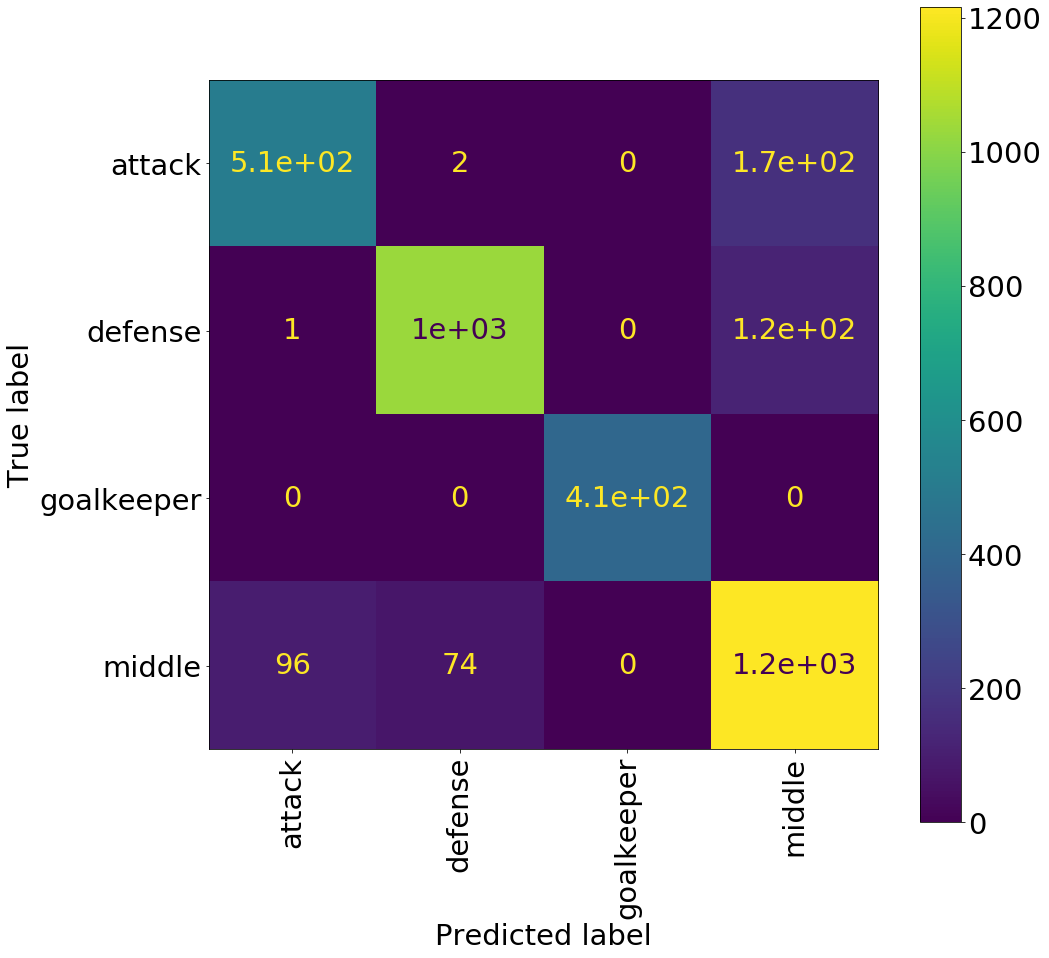

In [53]:
clf = AdaBoostClassifier(n_estimators=100, base_estimator=DecisionTreeClassifier(max_depth=10))
clf.fit(X_train, y_train)
custom_classification_report(clf, labels, X_test, y_test, figsize=(15, 15))

## Gradient tree boosting

Gradient Tree Boosting or Gradient Boosted Decision Trees (GBDT) is a generalization of boosting to arbitrary differentiable loss functions. GBDT is an accurate and effective off-the-shelf procedure that can be used for both regression and classification problems in a variety of areas including Web search ranking and ecology.

attack
precision: 0.7955882352941176
recall: 0.8426791277258567
f1-score: 0.8184568835098335
support: 642


defense
precision: 0.9369057908383751
recall: 0.9320722269991402
f1-score: 0.9344827586206897
support: 1163


goalkeeper
precision: 1.0
recall: 1.0
f1-score: 1.0
support: 407


middle
precision: 0.873015873015873
recall: 0.8533145275035261
f1-score: 0.8630527817403709
support: 1418


accuracy: 0.8931129476584022


macro avg
precision: 0.9013774747870914
recall: 0.9070164705571309
f1-score: 0.9039981059677236
support: 3630


weighted avg
precision: 0.8940290880827442
recall: 0.8931129476584022
f1-score: 0.8934054027540004
support: 3630


F1
micro: 0.8931129476584022
macro: 0.9039981059677236




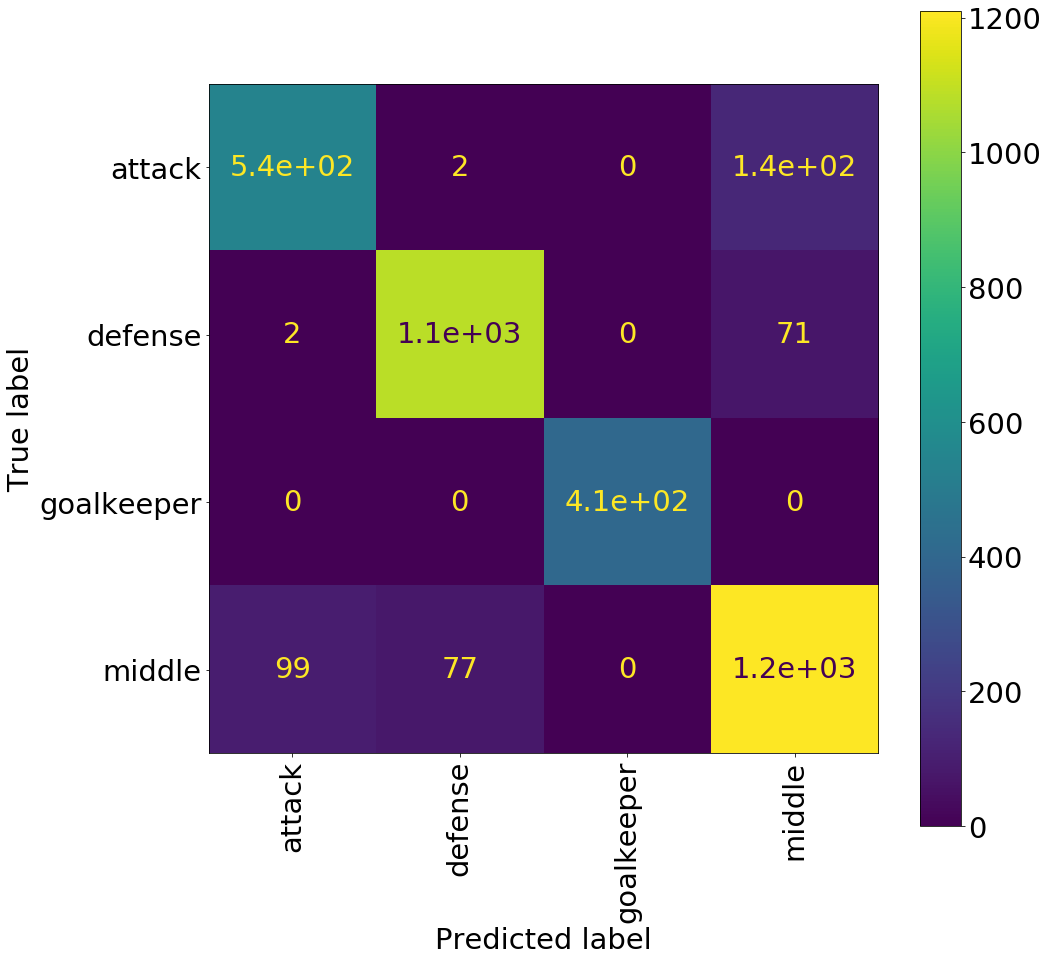

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100)
clf.fit(X_train, y_train)
custom_classification_report(clf, labels, X_test, y_test, figsize=(15, 15))

## Voting classifier

The idea behind the VotingClassifier is to combine conceptually different machine learning classifiers and use a majority vote or the average predicted probabilities (soft vote) to predict the class labels. Such a classifier can be useful for a set of equally well performing model in order to balance out their individual weaknesses.

### Hard voting

In majority(hard) voting, the predicted class label for a particular sample is the class label that represents the majority (mode) of the class labels predicted by each individual classifier.



In [55]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


attack
precision: 0.825
recall: 0.825
f1-score: 0.825
support: 680


defense
precision: 0.9282627484874676
recall: 0.927461139896373
f1-score: 0.9278617710583154
support: 1158


goalkeeper
precision: 1.0
recall: 1.0
f1-score: 1.0
support: 407


middle
precision: 0.854978354978355
recall: 0.855595667870036
f1-score: 0.8552869000360881
support: 1385


accuracy: 0.8889807162534435


macro avg
precision: 0.9020602758664555
recall: 0.9020142019416022
f1-score: 0.9020371677736008
support: 3630


weighted avg
precision: 0.8890009047916003
recall: 0.8889807162534435
f1-score: 0.8889907127921519
support: 3630


F1
micro: 0.8889807162534435
macro: 0.9020371677736008




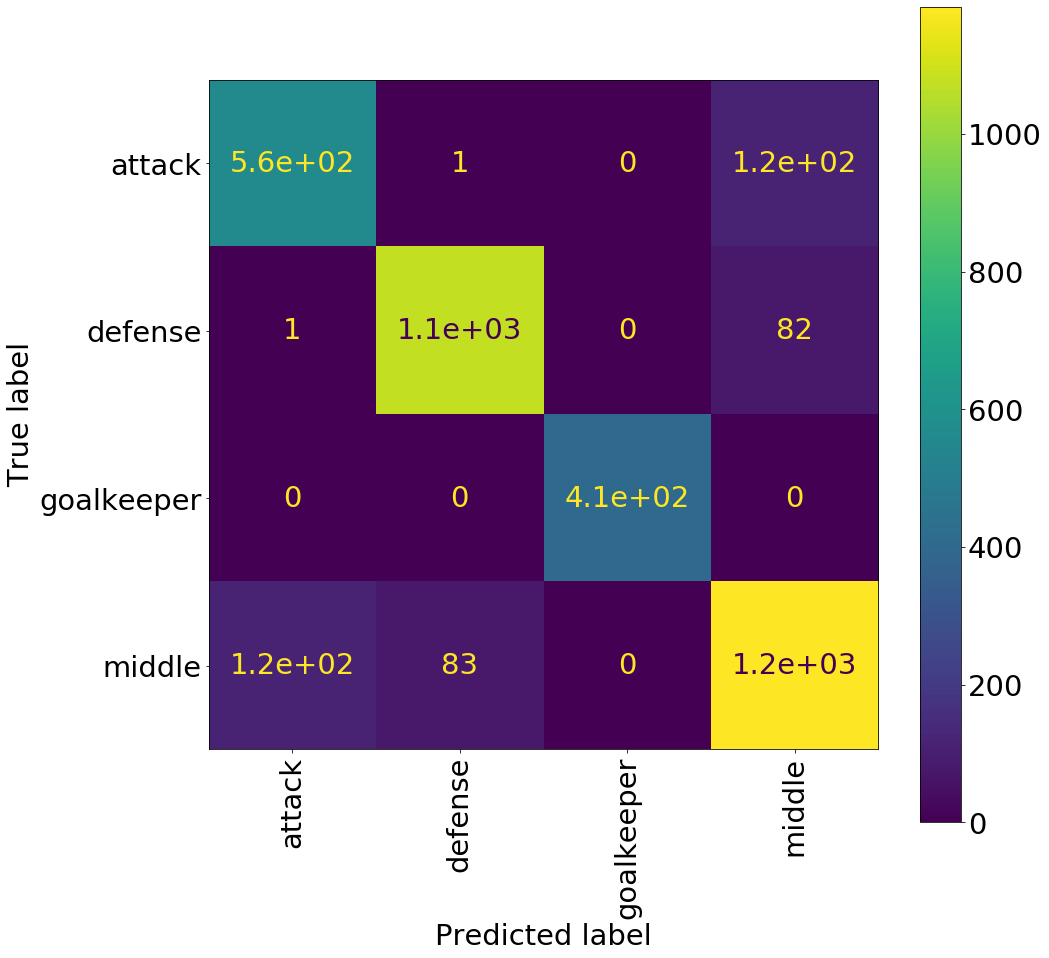

In [56]:
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf.fit(X_train, y_train)
custom_classification_report(eclf, labels, X_test, y_test, figsize=(15, 15))

### Soft voting

In contrast to majority voting (hard voting), soft voting returns the class label as argmax of the sum of predicted probabilities.

Specific weights can be assigned to each classifier via the weights parameter. When weights are provided, the predicted class probabilities for each classifier are collected, multiplied by the classifier weight, and averaged. The final class label is then derived from the class label with the highest average probability.

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


attack
precision: 0.8735294117647059
recall: 0.7270501835985312
f1-score: 0.7935871743486974
support: 817


defense
precision: 0.8841832324978393
recall: 0.8691588785046729
f1-score: 0.8766066838046274
support: 1177


goalkeeper
precision: 1.0
recall: 1.0
f1-score: 1.0
support: 407


middle
precision: 0.7301587301587301
recall: 0.8234336859235151
f1-score: 0.7739961759082218
support: 1229


accuracy: 0.8363636363636363


macro avg
precision: 0.8719678436053189
recall: 0.8549106870066798
f1-score: 0.8610475085153866
support: 3630


weighted avg
precision: 0.8426232158200553
recall: 0.8363636363636363
f1-score: 0.8370160023339219
support: 3630


F1
micro: 0.8363636363636363
macro: 0.8610475085153866




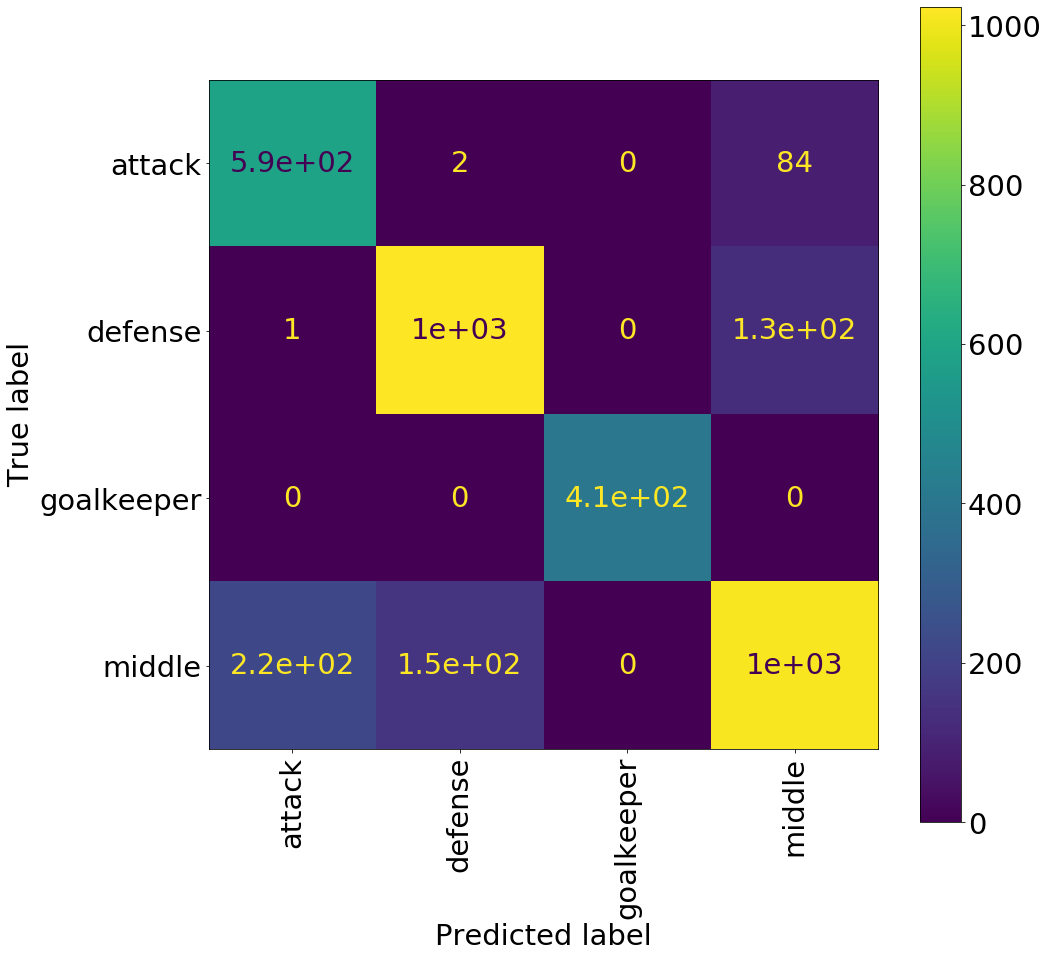

In [57]:
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft', weights=[2, 1, 2])
eclf.fit(X_train, y_train)
custom_classification_report(eclf, labels, X_test, y_test, figsize=(15, 15))

## Stacked generalization

Stacked generalization is a method for combining estimators to reduce their biases [W1992] [HTF]. More precisely, the predictions of each individual estimator are stacked together and used as input to a final estimator to compute the prediction. This final estimator is trained through cross-validation.

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

attack
precision: 0.8044117647058824
recall: 0.831306990881459
f1-score: 0.8176382660687593
support: 658


defense
precision: 0.9377700950734659
recall: 0.9361518550474547
f1-score: 0.9369602763385146
support: 1159


goalkeeper
precision: 1.0
recall: 1.0
f1-score: 1.0
support: 407


middle
precision: 0.8694083694083694
recall: 0.8570412517780939
f1-score: 0.8631805157593123
support: 1406


accuracy: 0.89366391184573


macro avg
precision: 0.9028975572969293
recall: 0.9061250244267518
f1-score: 0.9044447645416466
support: 3630


weighted avg
precision: 0.8940954955247342
recall: 0.89366391184573
f1-score: 0.8938222436658885
support: 3630


F1
micro: 0.89366391184573
macro: 0.9044447645416466




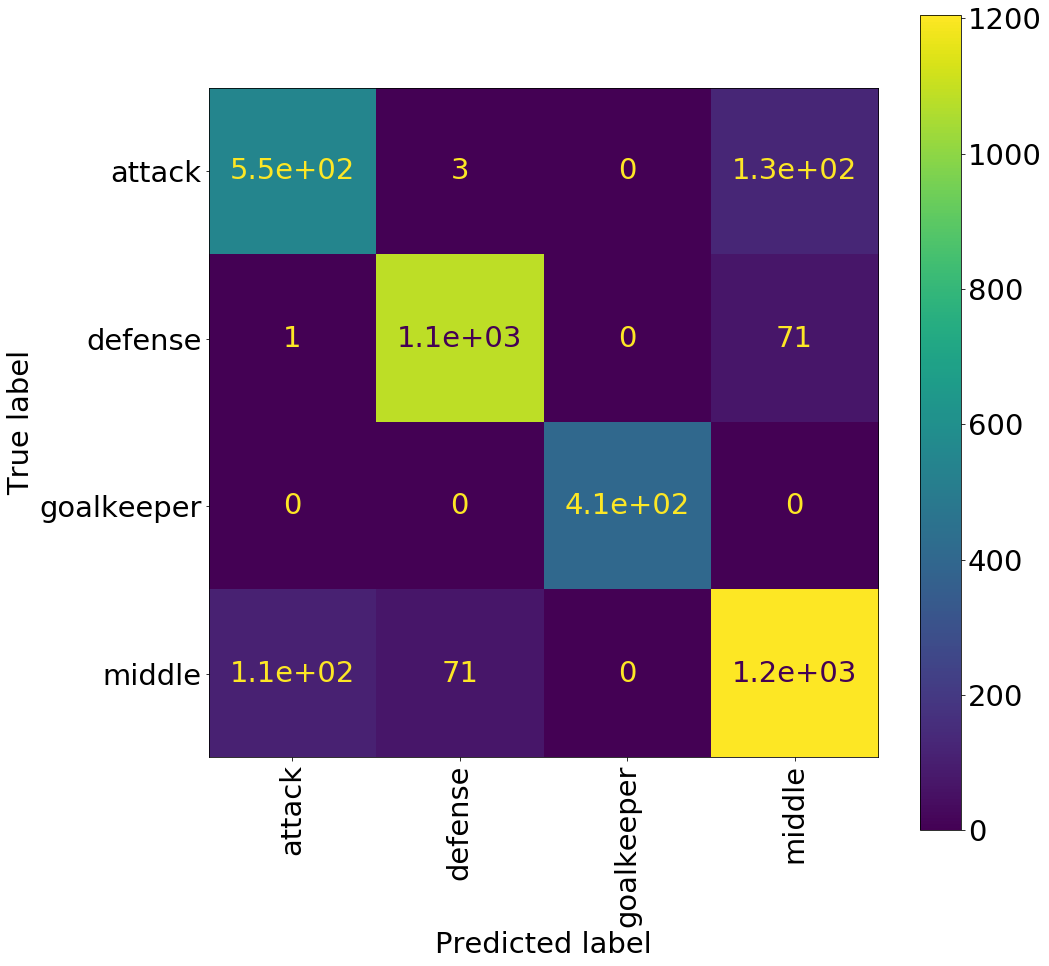

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)), ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state=42)))]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(X_train, y_train)
custom_classification_report(clf, labels, X_test, y_test, figsize=(15, 15))



# Classification of Position(13)

In [59]:
X_train, X_test, y_train, y_test = dataset.get_data('Position (13)')
labels = dataset.get_labels('Position (13)')

## Adaboost classifier

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


attacking midfielder
precision: 0.37777777777777777
recall: 0.4689655172413793
f1-score: 0.4184615384615384
support: 145


central attack
precision: 0.9342403628117913
recall: 0.6754098360655738
f1-score: 0.7840152235965747
support: 610


central defense
precision: 0.7633587786259542
recall: 0.7067137809187279
f1-score: 0.7339449541284404
support: 283


deffensive midfielder
precision: 0.4581818181818182
recall: 0.5431034482758621
f1-score: 0.4970414201183432
support: 232


goalkeeper
precision: 1.0
recall: 1.0
f1-score: 1.0
support: 407


left attack
precision: 0.017094017094017096
recall: 0.25
f1-score: 0.032
support: 8


left defense
precision: 0.7867647058823529
recall: 0.8392156862745098
f1-score: 0.8121442125237192
support: 255


left midfielder
precision: 0.2510822510822511
recall: 0.3118279569892473
f1-score: 0.27817745803357313
support: 186


middle
precision: 0.0
recall: 0.0
f1-score: 0.0
support: 0


midfielder
precision: 0.7722342733188721
recall: 0.5519379844961241
f1-scor

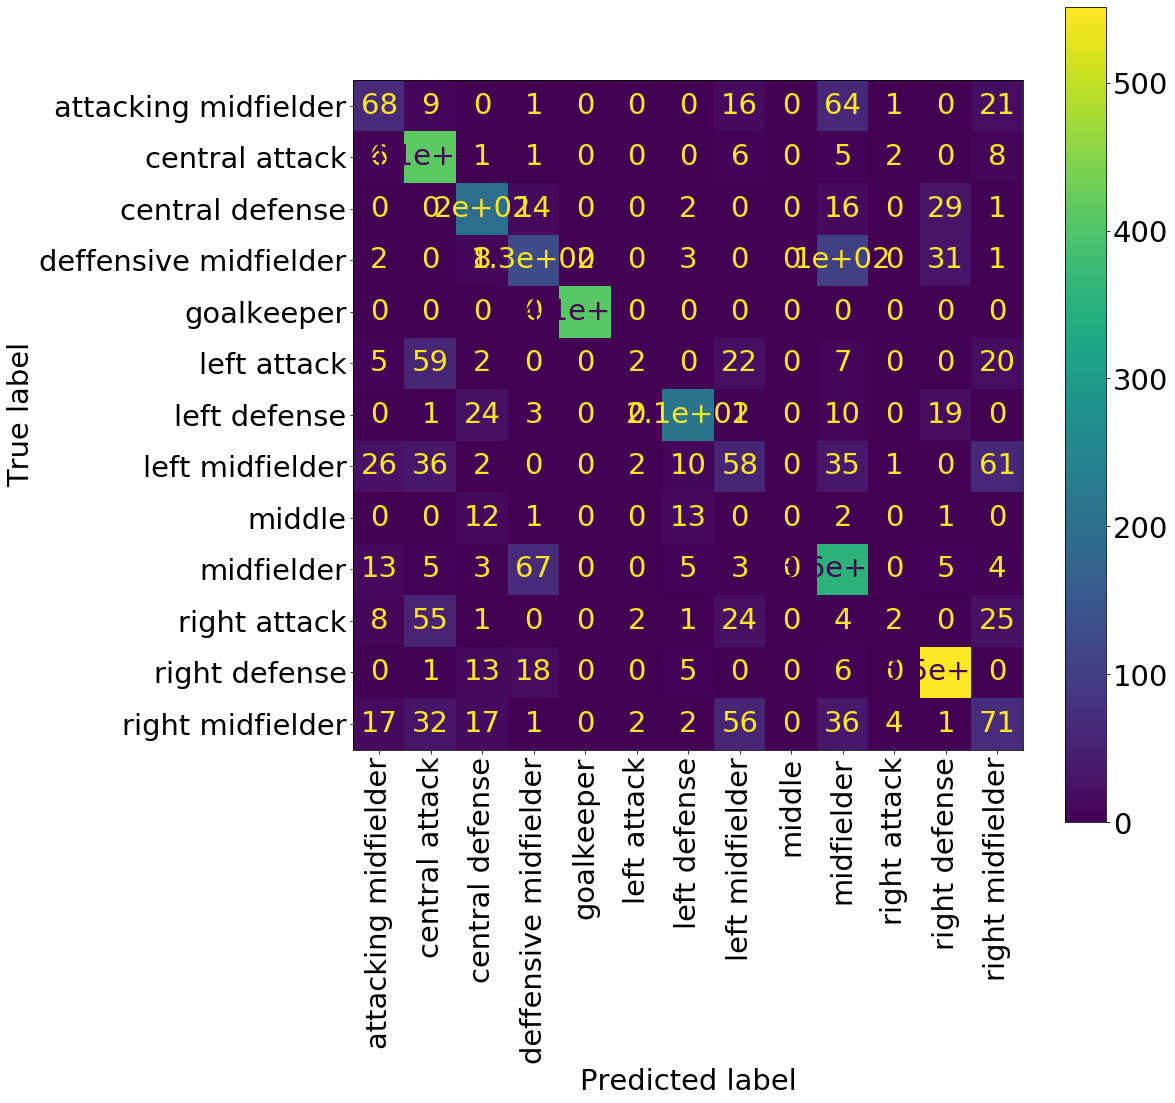

In [60]:
clf = AdaBoostClassifier(n_estimators=100, base_estimator=DecisionTreeClassifier(max_depth=30))
clf.fit(X_train, y_train)
custom_classification_report(clf, labels, X_test, y_test, figsize=(15, 15))

## Gradient tree boosting

attacking midfielder
precision: 0.48333333333333334
recall: 0.5087719298245614
f1-score: 0.4957264957264957
support: 171


central attack
precision: 0.927437641723356
recall: 0.7175438596491228
f1-score: 0.8090999010880318
support: 570


central defense
precision: 0.7824427480916031
recall: 0.6765676567656765
f1-score: 0.7256637168141593
support: 303


deffensive midfielder
precision: 0.5709090909090909
recall: 0.5924528301886792
f1-score: 0.5814814814814815
support: 265


goalkeeper
precision: 1.0
recall: 1.0
f1-score: 1.0
support: 407


left attack
precision: 0.06837606837606838
recall: 0.2962962962962963
f1-score: 0.11111111111111112
support: 27


left defense
precision: 0.8051470588235294
recall: 0.8171641791044776
f1-score: 0.8111111111111112
support: 268


left midfielder
precision: 0.30303030303030304
recall: 0.35175879396984927
f1-score: 0.32558139534883723
support: 199


middle
precision: 0.0
recall: 0.0
f1-score: 0.0
support: 6


midfielder
precision: 0.720173535791757
recall

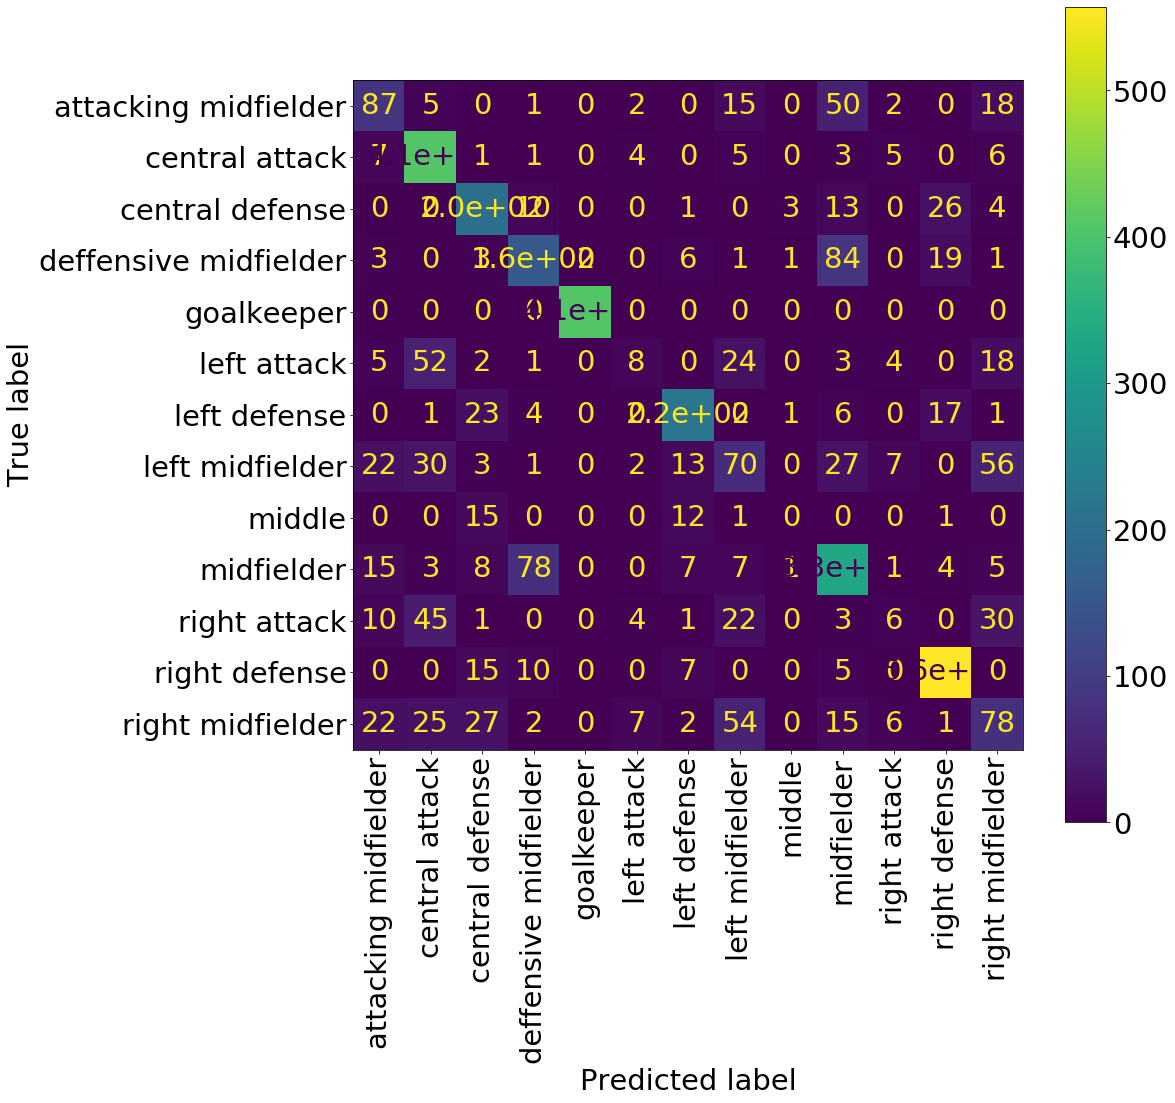

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100)
clf.fit(X_train, y_train)
custom_classification_report(clf, labels, X_test, y_test, figsize=(15, 15))

## Voting classifier

In [62]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

### Hard voting

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


attacking midfielder
precision: 0.5166666666666667
recall: 0.45145631067961167
f1-score: 0.4818652849740933
support: 206


central attack
precision: 0.9319727891156463
recall: 0.6954314720812182
f1-score: 0.7965116279069768
support: 591


central defense
precision: 0.8435114503816794
recall: 0.6350574712643678
f1-score: 0.7245901639344263
support: 348


deffensive midfielder
precision: 0.5163636363636364
recall: 0.5657370517928287
f1-score: 0.5399239543726235
support: 251


goalkeeper
precision: 1.0
recall: 1.0
f1-score: 1.0
support: 407


left attack
precision: 0.03418803418803419
recall: 0.15384615384615385
f1-score: 0.05594405594405596
support: 26


left defense
precision: 0.8125
recall: 0.7647058823529411
f1-score: 0.787878787878788
support: 289


left midfielder
precision: 0.15151515151515152
recall: 0.3684210526315789
f1-score: 0.21472392638036808
support: 95


middle
precision: 0.0
recall: 0.0
f1-score: 0.0
support: 0


midfielder
precision: 0.6746203904555315
recall: 0.64926931

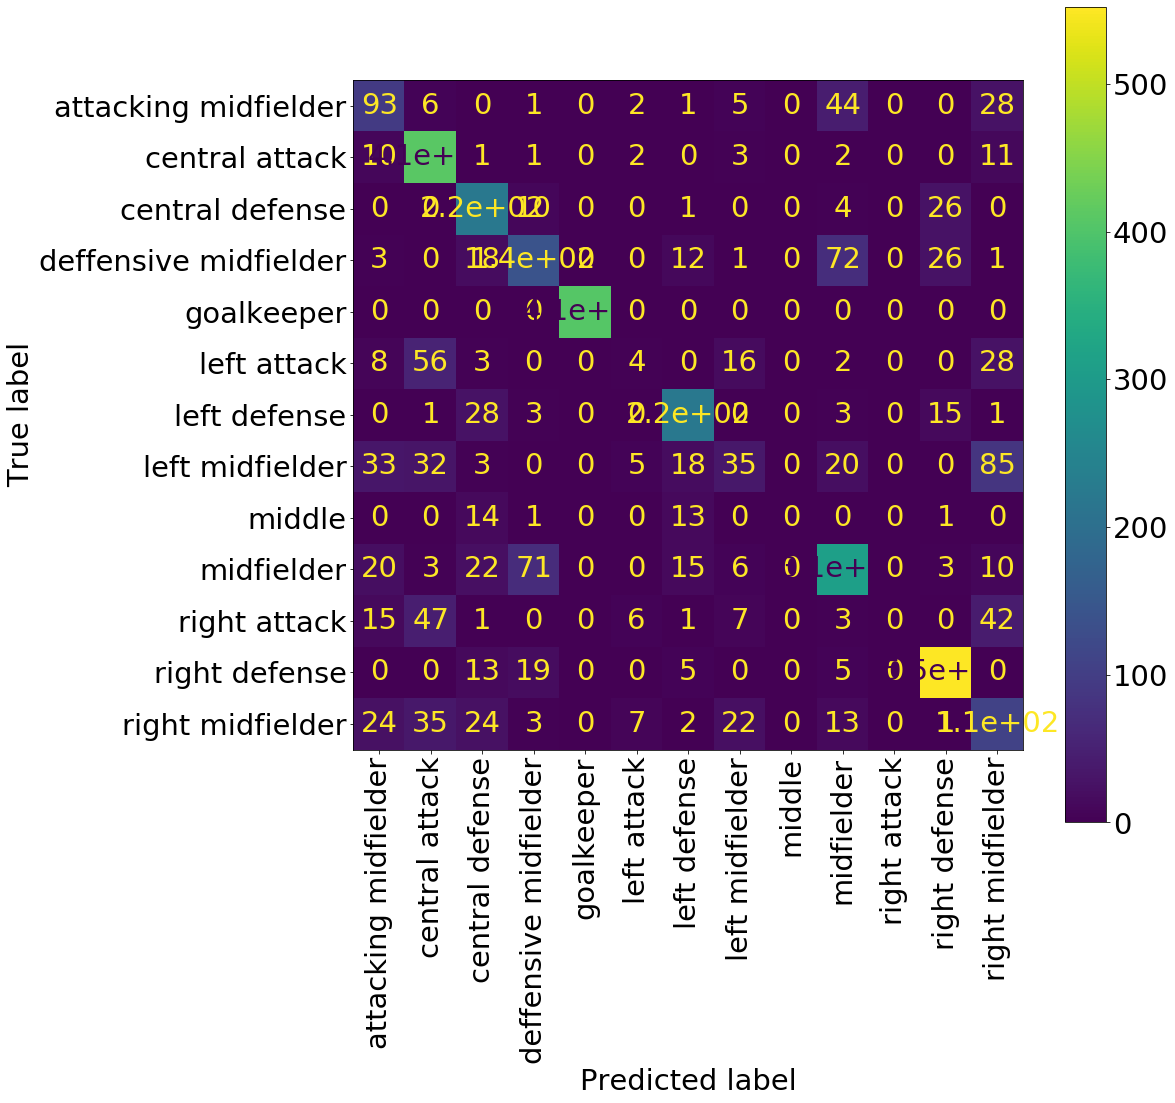

In [63]:
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf.fit(X_train, y_train)
custom_classification_report(eclf, labels, X_test, y_test, figsize=(15, 15))

### Soft voting

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


attacking midfielder
precision: 0.07777777777777778
recall: 0.4827586206896552
f1-score: 0.1339712918660287
support: 29


central attack
precision: 0.7437641723356009
recall: 0.8098765432098766
f1-score: 0.7754137115839242
support: 405


central defense
precision: 0.7442748091603053
recall: 0.5701754385964912
f1-score: 0.6456953642384106
support: 342


deffensive midfielder
precision: 0.4727272727272727
recall: 0.4626334519572954
f1-score: 0.4676258992805755
support: 281


goalkeeper
precision: 1.0
recall: 1.0
f1-score: 1.0
support: 407


left attack
precision: 0.008547008547008548
recall: 0.07692307692307693
f1-score: 0.015384615384615387
support: 13


left defense
precision: 0.7389705882352942
recall: 0.7701149425287356
f1-score: 0.7542213883677298
support: 261


left midfielder
precision: 0.0
recall: 0.0
f1-score: 0.0
support: 0


middle
precision: 0.0
recall: 0.0
f1-score: 0.0
support: 1


midfielder
precision: 0.3405639913232104
recall: 0.6408163265306123
f1-score: 0.4447592067988

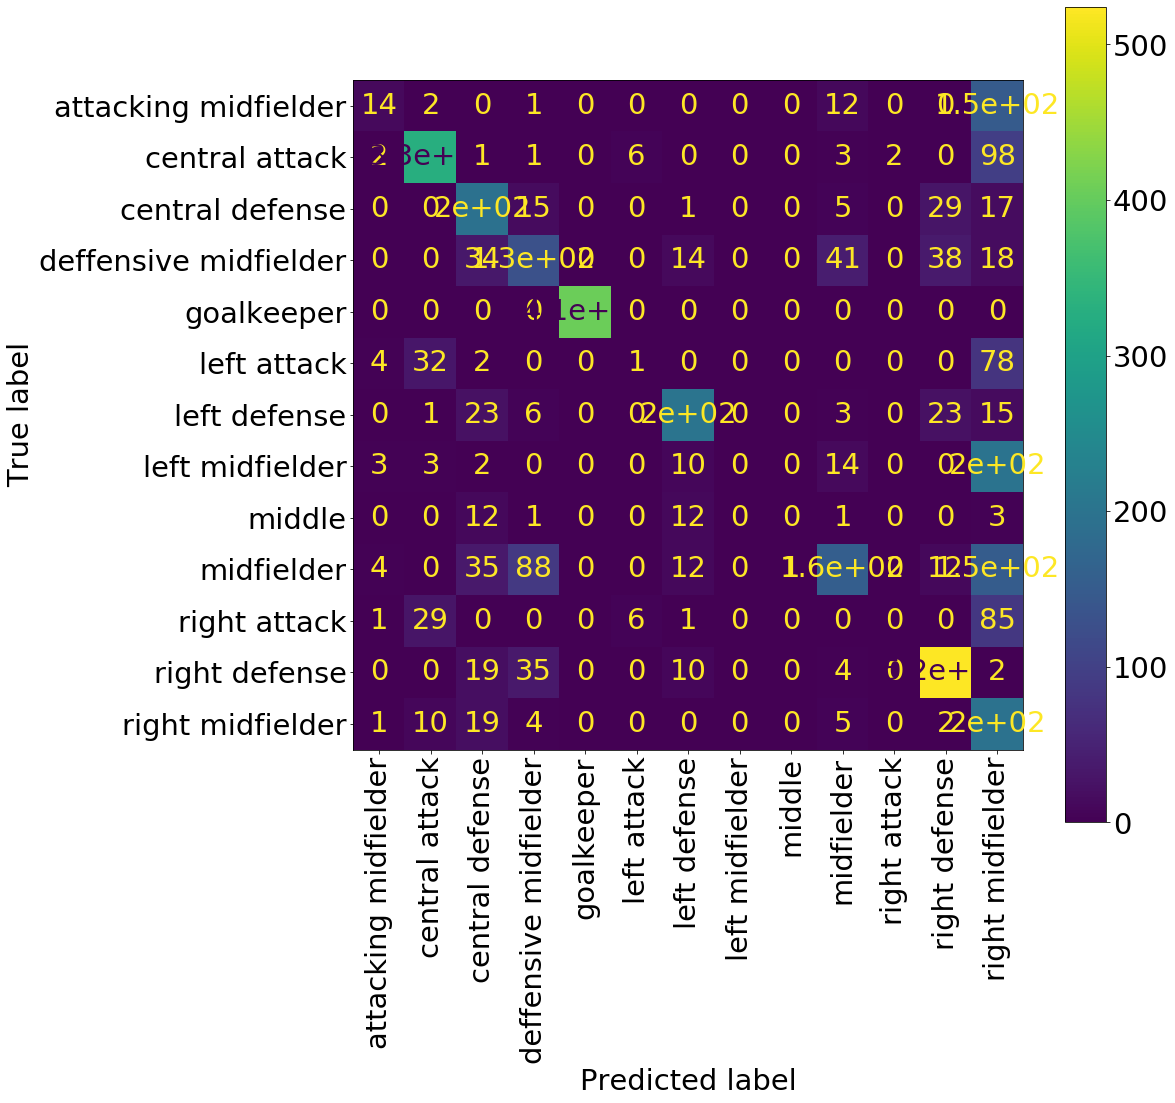

In [64]:
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft', weights=[2, 1, 2])
eclf.fit(X_train, y_train)
custom_classification_report(eclf, labels, X_test, y_test, figsize=(15, 15))

## Stacked generalization

Stacked generalization is a method for combining estimators to reduce their biases [W1992] [HTF]. More precisely, the predictions of each individual estimator are stacked together and used as input to a final estimator to compute the prediction. This final estimator is trained through cross-validation.

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

attacking midfielder
precision: 0.5
recall: 0.5056179775280899
f1-score: 0.5027932960893854
support: 178


central attack
precision: 0.9387755102040817
recall: 0.6957983193277311
f1-score: 0.7992277992277993
support: 595


central defense
precision: 0.8625954198473282
recall: 0.7018633540372671
f1-score: 0.773972602739726
support: 322


deffensive midfielder
precision: 0.5636363636363636
recall: 0.6175298804780877
f1-score: 0.5893536121673003
support: 251


goalkeeper
precision: 1.0
recall: 1.0
f1-score: 1.0
support: 407


left attack
precision: 0.05128205128205128
recall: 0.3157894736842105
f1-score: 0.08823529411764706
support: 19


left defense
precision: 0.8125
recall: 0.8185185185185185
f1-score: 0.8154981549815499
support: 270


left midfielder
precision: 0.3116883116883117
recall: 0.36363636363636365
f1-score: 0.3356643356643357
support: 198


middle
precision: 0.0
recall: 0.0
f1-score: 0.0
support: 0


midfielder
precision: 0.7917570498915402
recall: 0.6506238859180036
f1-score

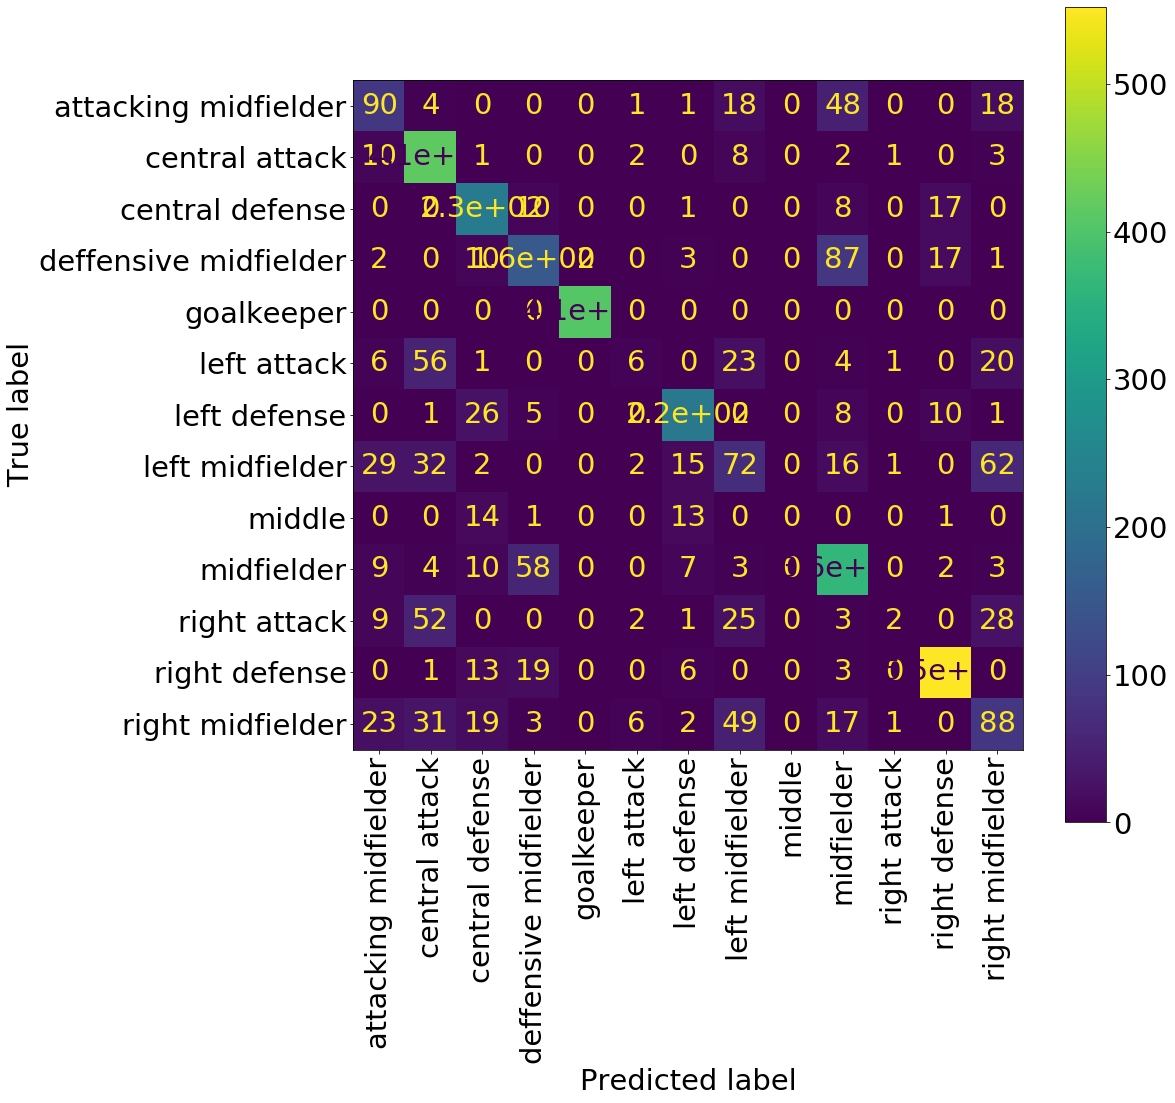

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)), ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state=42)))]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(X_train, y_train)
custom_classification_report(clf, labels, X_test, y_test, figsize=(15, 15))

